과적합 피하기
===
## 1. 데이터의 확인과 실행
* 실습: 초음파 광물 예측
  * 데이터 : sonar.csv
* 광석과 일반 돌을 가져다 놓고 음파 탐지기를 쏜 후 그 결과를 데이터로 정리함.
* 오차 역전파 알고리즘을 사용한 신경망이 광석과 돌을 구분하는 데 얼마나 효과적인지 조사.

In [1]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import tensorflow as tf

# seed 설정
np.random.seed(3)
tf.random.set_seed(3)

# 데이터 입력
df = pd.read_csv("./csv_data/sonar.csv", header=None)
df.head()
# 60 번 열이 클래스

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [9]:
dataset = df.values
X = dataset[:, 0 : 60]
X = np.asarray(X).astype(np.float32)    # dtype이 object인데, float로 바꿔줌.

Y_obj = dataset[:, 60]

# 문자열 변환
e = LabelEncoder()
Y = e.fit_transform(Y_obj)

# 모델 설정
model = Sequential()
model.add(Dense(24, input_dim=60, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# 모델 컴파일
model.compile(loss="binary_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

# 모델 실행
model.fit(X, Y, epochs=200, batch_size=5)

# 결과 출력
print(f"\n Accuracy : {model.evaluate(X, Y)[1]:.4f}")

# 정확도 100% : 과적합(overfitting)

Epoch 1/200
42/42 [==============================] - 0s 634us/step - loss: 0.6795 - accuracy: 0.5913
Epoch 2/200
42/42 [==============================] - 0s 659us/step - loss: 0.6517 - accuracy: 0.6250
Epoch 3/200
42/42 [==============================] - 0s 732us/step - loss: 0.6328 - accuracy: 0.6587
Epoch 4/200
42/42 [==============================] - 0s 683us/step - loss: 0.5994 - accuracy: 0.7067
Epoch 5/200
42/42 [==============================] - 0s 683us/step - loss: 0.5664 - accuracy: 0.7644
Epoch 6/200
42/42 [==============================] - 0s 683us/step - loss: 0.5420 - accuracy: 0.7500
Epoch 7/200
42/42 [==============================] - 0s 708us/step - loss: 0.5088 - accuracy: 0.7644
Epoch 8/200
42/42 [==============================] - 0s 720us/step - loss: 0.4829 - accuracy: 0.7740
Epoch 9/200
42/42 [==============================] - 0s 707us/step - loss: 0.4707 - accuracy: 0.7788
Epoch 10/200
42/42 [==============================] - 0s 756us/step - loss: 0.4490 - accura

## 2. 과적합 이해하기
* 과적합(overfitting) : 모델이 학습 데이터셋에서는 어느 정도 예측 정확도를 보이지만, 새로운 데이터에 적용하면 잘 맞지 않는 것.
* 과적합은 층이 너무 많을 때, 변수가 복잡할 때, 테스트셋과 학습셋이 중복될 때 생기기도 함.
* 딥러닝은 학습 단계에서 입력층, 은닉층, 출력층의 노드들에 상당히 많은 변수들이 투입됨.
* 딥러닝을 진행하는 동안 과적합에 빠지지 않게 늘 주의해야 함.
## 3. 학습셋과 테스트셋
* 과적합을 방지하려면,
  * 학습 데이터셋과 테스트 데이터셋을 구분한 다음 학습과 동시에 테스트를 병행하며 진행.
* 예를 들어, 데이터셋이 총 100개의 샘플로 이루어져 있다면 7:3으로 나눔.
  * 신경망을 만들어 70개의 샘플로 학습을 진행한 후 이 학습의 결과(모델)을 파일에 저장함.
  * 모델을 다른 셋에 적용할 경우 학습 단계에서 얻은 결과를 그대로 수행함.
  * 나머지 30개의 테스트 샘플로 실험해서 정확도를 살펴보면 학습이 잘 되었는지 파악 가능.
* 딥러닝 같은 알고리즘을 충분히 조절하여 가장 나은 모델이 만들어지면, 이를 실생활에 대입하여 활용하는 것이 머신러닝의 개발 순서.
  * 학습 데이터를 토대로 새로운 데이터를 예측하는 것이 목적이기 때문에 테스트 셋을 만들어 정확한 평가를 병행하는 것이 매우 중요함.
* 학습셋만 가지고 평가할 때, 층을 더하거나 에포크 값을 높이면 정확도가 계속해서 올라갈 수 있음.
* 학습이 깊어져서 학습셋의 정확도는 높아져도 테스트셋에서 효과가 없다면 과적합 발생으로 판단.
  * 학습을 진행해도 테스트 결과가 더 이사 좋아지지 않는 점에서 학습을 멈춰야 함. 이 때의 학습 정도가 가장 적절한 것으로 볼 수 있음.
* 검증셋(Validation sets) 개념
  * 실전에서는 더 정확한 테스트를 위해 테스트셋을 두 개로 나누어, 하나는 앞서 설명한 사용하고, 나머지 하나는 최종으로 만들어 낸 모델을 다시 한 번 테스트하는 용도로 사용하기도 함. 추가로 만들어낸 테스트셋을 검증셋이라고도 부름.

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import tensorflow as tf

# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

df = pd.read_csv("./csv_data/sonar.csv", header=None)

dataset = df.values
X = dataset[:, 0:60]
X = np.asarray(X).astype(np.float32)    # dtype이 object인데, float로 바꿔줌.
Y_obj = dataset[:,60]

e = LabelEncoder()
Y = e.fit_transform(Y_obj)

# 학습 셋과 테스트 셋의 구분
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y, test_size=0.3, random_state=seed)

# 모형 설정
model = Sequential()
model.add(Dense(24, input_dim=60, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="mean_squared_error",
            optimizer="adam",
            metrics=["accuracy"])

model.fit(X_train, Y_train, epochs=130, batch_size=5)

# 테스트셋에 모델 적용
print(f"\n Test Accuracy : {model.evaluate(X_test, Y_test)[1]:.4f}")

# 정확도 0.8571이 나옴. 앞서 학습셋만으로 실행했을 때 나온 100%와 비교.

Epoch 1/130
29/29 [==============================] - 0s 623us/step - loss: 0.2472 - accuracy: 0.4897
Epoch 2/130
29/29 [==============================] - 0s 679us/step - loss: 0.2317 - accuracy: 0.6414
Epoch 3/130
29/29 [==============================] - 0s 643us/step - loss: 0.2241 - accuracy: 0.6207
Epoch 4/130
29/29 [==============================] - 0s 678us/step - loss: 0.2139 - accuracy: 0.6897
Epoch 5/130
29/29 [==============================] - 0s 679us/step - loss: 0.2034 - accuracy: 0.7379
Epoch 6/130
29/29 [==============================] - 0s 736us/step - loss: 0.1925 - accuracy: 0.7517
Epoch 7/130
29/29 [==============================] - 0s 643us/step - loss: 0.1819 - accuracy: 0.7517
Epoch 8/130
29/29 [==============================] - 0s 679us/step - loss: 0.1729 - accuracy: 0.8069
Epoch 9/130
29/29 [==============================] - 0s 643us/step - loss: 0.1650 - accuracy: 0.7862
Epoch 10/130
29/29 [==============================] - 0s 643us/step - loss: 0.1618 - accura

## 4. 모델 저장과 재사용
* 학습이 끝난 후 테스트해 본 결과가 만족스러울 때 이를 모델로 저장하여 새로운 데이터에 사용 가능.

In [11]:
model.save("my_model.h5")   # 모델을 컴퓨터에 저장

In [13]:
from keras.models import load_model
model = load_model("my_model.h5")   # 모델을 새로 불러옴

In [23]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import tensorflow as tf

# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

df = pd.read_csv("./csv_data/sonar.csv", header=None)

dataset = df.values
X = dataset[:, 0:60]
X = np.asarray(X).astype(np.float32)    # dtype이 object인데, float로 바꿔줌.
Y_obj = dataset[:,60]

e = LabelEncoder()
Y = e.fit_transform(Y_obj)

# 학습 셋과 테스트 셋의 구분
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y, test_size=0.3, random_state=seed)

# 모형 설정
model = Sequential()
model.add(Dense(24, input_dim=60, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="mean_squared_error",
            optimizer="adam",
            metrics=["accuracy"])

history = model.fit(X_train, Y_train, epochs=130, batch_size=5)
model.save("my_model.h5")   # 모델을 컴퓨터에 저장

Epoch 1/130
29/29 [==============================] - 0s 617us/step - loss: 0.2472 - accuracy: 0.4897
Epoch 2/130
29/29 [==============================] - 0s 679us/step - loss: 0.2317 - accuracy: 0.6414
Epoch 3/130
29/29 [==============================] - 0s 714us/step - loss: 0.2241 - accuracy: 0.6207
Epoch 4/130
29/29 [==============================] - 0s 643us/step - loss: 0.2139 - accuracy: 0.6897
Epoch 5/130
29/29 [==============================] - 0s 750us/step - loss: 0.2034 - accuracy: 0.7379
Epoch 6/130
29/29 [==============================] - 0s 688us/step - loss: 0.1925 - accuracy: 0.7517
Epoch 7/130
29/29 [==============================] - 0s 679us/step - loss: 0.1819 - accuracy: 0.7517
Epoch 8/130
29/29 [==============================] - 0s 679us/step - loss: 0.1729 - accuracy: 0.8069
Epoch 9/130
29/29 [==============================] - 0s 643us/step - loss: 0.1650 - accuracy: 0.7862
Epoch 10/130
29/29 [==============================] - 0s 750us/step - loss: 0.1618 - accura

In [24]:
del model       # 테스트를 위해 메모리 내의 모델을 삭제
model = load_model("my_model.h5")   # 모델을 새로 불러옴

In [25]:
print(f"\n Accuracy : {model.evaluate(X_test, Y_test)[1]:.4f}") # 불러온 모델로 테스트 실행

2/2 [==============================] - 0s 2ms/step - loss: 0.1447 - accuracy: 0.8571

 Accuracy : 0.8571


In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

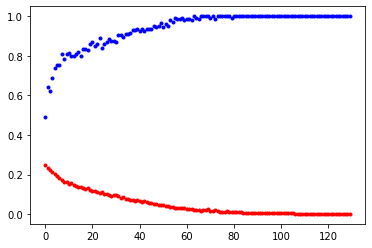

In [39]:
# accuracy, error 그래프
import matplotlib.pyplot as plt

y_loss = history.history["loss"]
y_accu = history.history["accuracy"]
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_loss, "o", c="red", markersize=3)
plt.plot(x_len, y_accu, "o", c="blue", markersize=3)

plt.show()

## 5. K-Fold 교차 검증
* 딥러닝 혹은 머신러닝 작업을 할 때 직면하는 문제 중 하나는 알고리즘을 충분히 테스트했더라도 데이터가 충분하지 않으면 좋은 결과를 내기가 어렵다는 것.
* 이러한 단점을 보완하고자 만든 방법이 K-Fold Cross Validation
* K-Fold : 데이터셋을 여러 개로 나누어 하나씩 테스트셋으로 사용하고 나머지를 모두 합해서 학습셋으로 사용하는 방법.
* 위 방식을 통해 보유한 데이터의 100%를 테스트셋으로 사용할 수 있음.
* 코드를 통한 확인.
  * 10개의 파일을 쪼개 테스트하는 10차 교차 검증(n_fold=10).
  * StratifiedKFold() 함수 : 데이터를 원하는 숫자만큼 쪼개 각각 학습셋과 테스트셋으로 사용하는 함수.
  * 모델을 만들고 실행하는 부분을 for문으로 묶어 n_fold만큼 반복되게 함.
  * 정확도(Accuracy)를 매번 저장하여 한 번에 보여줄 수 있도록 accuracy 리스트를 만듦.

In [41]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import StratifiedKFold

# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

df = pd.read_csv("./csv_data/sonar.csv", header=None)

dataset = df.values
X = dataset[:, 0:60]
X = np.asarray(X).astype(np.float32)    # dtype이 object인데, float로 바꿔줌.
Y_obj = dataset[:,60]

e = LabelEncoder()
Y = e.fit_transform(Y_obj)

# 10개의 파일로 쪼갬
n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

# 빈 accuracy 배열
accuracy = []

# 모델의 설정, 컴파일, 실행
for train, test in skf.split(X, Y) :
    model = Sequential()
    model.add(Dense(24, input_dim=60, activation="relu"))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(loss="mean_squared_error",
                optimizer="adam",
                metrics=["accuracy"])
    history = model.fit(X_train, Y_train, epochs=130, batch_size=5)
    k_accuracy = f"{model.evaluate(X[test], Y[test])[1]:.4f}"
    accuracy.append(k_accuracy)

# 결과 출력
print(f"\n {n_fold} fold accuracy : {accuracy}")

Epoch 1/130
29/29 [==============================] - 0s 571us/step - loss: 0.2472 - accuracy: 0.4897
Epoch 2/130
29/29 [==============================] - 0s 679us/step - loss: 0.2317 - accuracy: 0.6414
Epoch 3/130
29/29 [==============================] - 0s 653us/step - loss: 0.2241 - accuracy: 0.6207
Epoch 4/130
29/29 [==============================] - 0s 643us/step - loss: 0.2139 - accuracy: 0.6897
Epoch 5/130
29/29 [==============================] - 0s 786us/step - loss: 0.2034 - accuracy: 0.7379
Epoch 6/130
29/29 [==============================] - 0s 714us/step - loss: 0.1925 - accuracy: 0.7517
Epoch 7/130
29/29 [==============================] - 0s 714us/step - loss: 0.1819 - accuracy: 0.7517
Epoch 8/130
29/29 [==============================] - 0s 645us/step - loss: 0.1729 - accuracy: 0.8069
Epoch 9/130
29/29 [==============================] - 0s 714us/step - loss: 0.1650 - accuracy: 0.7862
Epoch 10/130
29/29 [==============================] - 0s 679us/step - loss: 0.1618 - accura

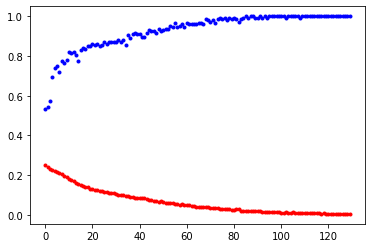

In [43]:
# accuracy, error 그래프
import matplotlib.pyplot as plt

y_loss = history.history["loss"]
y_accu = history.history["accuracy"]
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_loss, "o", c="red", markersize=3)
plt.plot(x_len, y_accu, "o", c="blue", markersize=3)

plt.show()